In [2]:
import pandas as pd
df = pd.read_csv('countries.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,country,latitude,longitude,name
0,0,0,AD,42.546245,1.601554,Andorra
1,1,1,AE,23.424076,53.847818,United Arab Emirates
2,2,2,AF,33.939110,67.709953,Afghanistan
3,3,3,AG,17.060816,-61.796428,Antigua and Barbuda
4,4,4,AI,18.220554,-63.068615,Anguilla


In [3]:
df = df.dropna(axis=1)

In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ordinal_categorical_feature'] = encoder.fit_transform(df['ordinal_categorical_feature'])

In [ ]:

df = pd.get_dummies(df, columns=['nominal_categorical_feature'], drop_first=True)

In [ ]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(data, cluster_labels)

print("Silhouette score:", silhouette_avg)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering model with the desired number of clusters
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = agglomerative.fit_predict(data)

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=data.index, distance_sort='descending', truncate_mode='level', p=3)
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model with the desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = dbscan.fit_predict(data)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()
data = iris_data.data
target = iris_data.target

# Standardize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

# Initialize the PCA model with the desired number of components
pca = PCA(n_components=2)

# Fit the model to the data and transform the data
reduced_data = pca.fit_transform(data)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Dimensionality Reduction')
plt.show()

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset

# please get the data from kaggle 
data = pd.read_csv("please get the data from kaggle")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model to the training data
iso_forest.fit(X_train)

# Make predictions on the test data
y_pred = iso_forest.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert the predictions from {-1, 1} to {0, 1}
y_pred = [1 if pred == -1 else 0 for pred in y_pred]

# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("CC GENERAL.csv")

# Drop the CUST_ID column and handle missing data
data = data.drop("CUST_ID", axis=1)
data = data.fillna(data.median())

# Feature scaling and normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

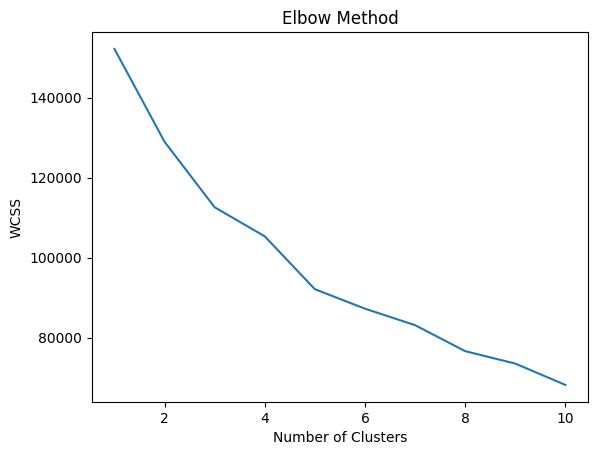

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-means clustering with the optimal number of clusters (k=4)
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(data_scaled)

/home/alpha/jupyt/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alpha/jupyt/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/alpha/jupyt/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alpha/jupyt/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

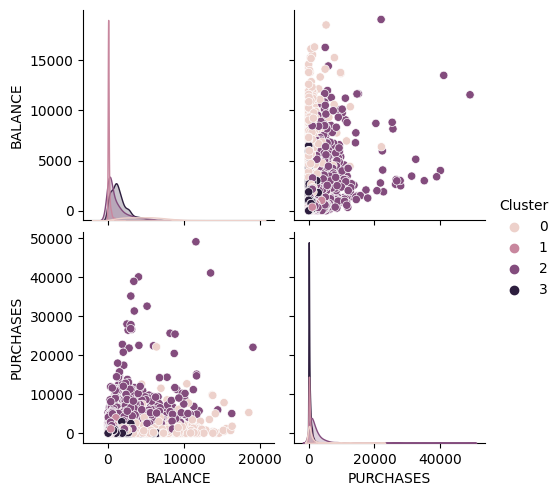

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

In [11]:
import seaborn as sns

# Add the cluster labels to the original dataset
data["Cluster"] = clusters

# Visualize the clusters using a pairplot with two selected features (e.g., BALANCE and PURCHASES)
sns.pairplot(data, vars=["BALANCE", "PURCHASES"], hue="Cluster")
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = data.groupby("Cluster").mean()
print(cluster_summary)